<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/Time_stepping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We consider a first-order ODE 
$$\frac{du}{dt}=f(u,t), \quad t\in (0, T]\\\text{with initial condition } u(0)=u_0 $$

Can we find the analytical solution easily?

For example

$$\frac{du}{dt}=-10\, u$$ 
with $u(0)=1$ can be easily solve to obtain $u(t)=\exp(-10\,t)$.

How about $\dfrac{du}{dt}=-10\, u^3 + u\,t$ with u(t)=1? Not easy to solve!

One needs to rely on numerical solution.

**Procedure**

*   Discretize the domain $(0, T]$ by $N$ grid points $0=t_0<t_1<...<t_{N-1}=T$ with $k=t_{n}-t_{n-1}$. 

*  Use the approximation $\dfrac{du}{dt}\approx \dfrac{u_n-u_{n-1}}{k}$ for the left-hand side of the equation.
*   How to approximate the right-hand side? There are several options

    *  $f(u,t)\approx f(u_{n-1},t_{n-1})$: Forward (explicit) Euler method
      $$\dfrac{u_n-u_{n-1}}{k}=f(u_{n-1},t_{n-1}) \implies u_n=kf(u_{n-1},t_{n-1})+u_{n-1}$$
      
    * $f(u,t)\approx f(u_{n},t_{n})$: Backward (implicit) Euler method
      $$\dfrac{u_n-u_{n-1}}{k}=f(u_{n},t_{n}) \implies u_n-kf(u_{n},t_{n})=u_{n-1}$$

    * $f(u,t)\approx \dfrac{1}{2} \Bigl( f(u_{n},t_{n}) +  f(u_{n-1},t_{n-1}) \Bigl)$: Crank Nilcolson (midpoint) method
      $$\dfrac{u_n-u_{n-1}}{k}=\dfrac{1}{2} \Bigl( f(u_{n},t_{n}) +  f(u_{n-1},t_{n-1}) \Bigl) \implies u_n-\dfrac{k}{2}f(u_{n},t_{n})=u_{n-1} + \dfrac{k}{2}f(u_{n-1},t_{n-1})$$
    * $f(u,t)\approx \theta f(u_{n},t_{n}) +  (1-\theta)f(u_{n-1},t_{n-1})$ with $\theta\in[0, 1]$: $\theta-method$
      $$\dfrac{u_n-u_{n-1}}{k}=\theta f(u_{n},t_{n}) +  (1-\theta)f(u_{n-1},t_{n-1}) \implies u_n-k \theta(u_{n},t_{n})=u_{n-1} + k(1-\theta)f(u_{n-1},t_{n-1})$$ 
      
**Quick test** verify that $\theta-$method is the general form of Euler and midpoint methods. 




**Why are there different schemes?**



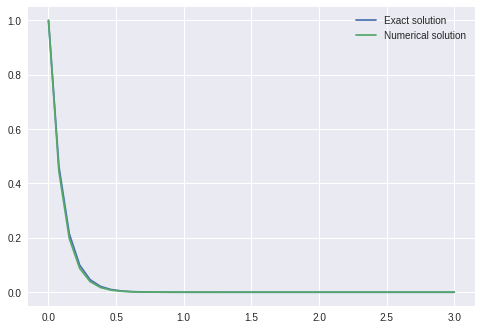

In [8]:
import numpy as np
import matplotlib.pyplot as plt


a, b  = 0, 3;
N = 40;
u = [0]*N;
t = np.linspace(a, b, num=N)
theta = 0.5;

u[0] = 1;
for i in range(1,N):
  dt = t[i] - t[i-1]
  u[i] = (u[i-1]+(1-theta)*dt*(-10*u[i-1]))/(1-theta*dt*(-10))

plt.plot(t,np.exp(-10*t),t,u)
plt.gca().legend(('Exact solution','Numerical solution'))